In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
#from sklearn.externals import joblib

import matplotlib.pyplot as plt
%matplotlib inline


# EDA

In [2]:
datafile = 'mojo_data.csv'
df = pd.read_csv(datafile, index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 0 to 199
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0.1            996 non-null    object 
 1   link_stub               996 non-null    object 
 2   rank                    996 non-null    object 
 3   title                   996 non-null    object 
 4   domestic_gross_x        996 non-null    object 
 5   release_year            996 non-null    int64  
 6   domestic_opening_gross  996 non-null    int64  
 7   budget                  996 non-null    int64  
 8   domestic_gross_y        996 non-null    int64  
 9   international_gross     996 non-null    int64  
 10  worldwide_gross         996 non-null    int64  
 11  runtime_minutes         975 non-null    float64
 12  rating                  867 non-null    object 
 13  release_month           996 non-null    int64  
 14  release_date            996 non-null    ob

In [4]:
df.rename( columns={'Unnamed: 0.1':'movie_title'}, inplace=True )
df.head(2)

,movie_title,link_stub,rank,title,domestic_gross_x,release_year,domestic_opening_gross,budget,domestic_gross_y,international_gross,worldwide_gross,runtime_minutes,rating,release_month,release_date,genres
0,Star Wars: Episode VII - The Force Awakens,/title/tt2488496/?ref_=bo_cso_table_1,1,Star Wars: Episode VII - The Force Awakens,"$936,662,225",2015,247966675,245000000,936662225,1131791908,2068454133,138.0,PG-13,12,2015-12-16,"['Action', 'Adventure', 'Sci-Fi']"
1,Avengers: Endgame,/title/tt4154796/?ref_=bo_cso_table_2,2,Avengers: Endgame,"$858,373,000",2019,357115007,356000000,858373000,1939427564,2797800564,181.0,PG-13,4,2019-04-24,"['Action', 'Adventure', 'Drama', 'Sci-Fi']"


In [5]:
df.index = np.arange(1, len(df) + 1)

In [6]:
df.head(2)

,movie_title,link_stub,rank,title,domestic_gross_x,release_year,domestic_opening_gross,budget,domestic_gross_y,international_gross,worldwide_gross,runtime_minutes,rating,release_month,release_date,genres
1,Star Wars: Episode VII - The Force Awakens,/title/tt2488496/?ref_=bo_cso_table_1,1,Star Wars: Episode VII - The Force Awakens,"$936,662,225",2015,247966675,245000000,936662225,1131791908,2068454133,138.0,PG-13,12,2015-12-16,"['Action', 'Adventure', 'Sci-Fi']"
2,Avengers: Endgame,/title/tt4154796/?ref_=bo_cso_table_2,2,Avengers: Endgame,"$858,373,000",2019,357115007,356000000,858373000,1939427564,2797800564,181.0,PG-13,4,2019-04-24,"['Action', 'Adventure', 'Drama', 'Sci-Fi']"


In [7]:
df.drop(['link_stub'], axis=1, inplace = True)

In [8]:
df.head(2)

,movie_title,rank,title,domestic_gross_x,release_year,domestic_opening_gross,budget,domestic_gross_y,international_gross,worldwide_gross,runtime_minutes,rating,release_month,release_date,genres
1,Star Wars: Episode VII - The Force Awakens,1,Star Wars: Episode VII - The Force Awakens,"$936,662,225",2015,247966675,245000000,936662225,1131791908,2068454133,138.0,PG-13,12,2015-12-16,"['Action', 'Adventure', 'Sci-Fi']"
2,Avengers: Endgame,2,Avengers: Endgame,"$858,373,000",2019,357115007,356000000,858373000,1939427564,2797800564,181.0,PG-13,4,2019-04-24,"['Action', 'Adventure', 'Drama', 'Sci-Fi']"


In [9]:
df.drop(['domestic_gross_x'], axis=1, inplace = True)

In [10]:
df.head(2)

,movie_title,rank,title,release_year,domestic_opening_gross,budget,domestic_gross_y,international_gross,worldwide_gross,runtime_minutes,rating,release_month,release_date,genres
1,Star Wars: Episode VII - The Force Awakens,1,Star Wars: Episode VII - The Force Awakens,2015,247966675,245000000,936662225,1131791908,2068454133,138.0,PG-13,12,2015-12-16,"['Action', 'Adventure', 'Sci-Fi']"
2,Avengers: Endgame,2,Avengers: Endgame,2019,357115007,356000000,858373000,1939427564,2797800564,181.0,PG-13,4,2019-04-24,"['Action', 'Adventure', 'Drama', 'Sci-Fi']"


In [11]:
df.drop(['title'], axis=1, inplace = True)

In [12]:
df.head(2)

,movie_title,rank,release_year,domestic_opening_gross,budget,domestic_gross_y,international_gross,worldwide_gross,runtime_minutes,rating,release_month,release_date,genres
1,Star Wars: Episode VII - The Force Awakens,1,2015,247966675,245000000,936662225,1131791908,2068454133,138.0,PG-13,12,2015-12-16,"['Action', 'Adventure', 'Sci-Fi']"
2,Avengers: Endgame,2,2019,357115007,356000000,858373000,1939427564,2797800564,181.0,PG-13,4,2019-04-24,"['Action', 'Adventure', 'Drama', 'Sci-Fi']"


In [13]:
df.rename( columns={'domestic_gross_y':'domestic_gross'}, inplace=True )

In [14]:
df.head()

,movie_title,rank,release_year,domestic_opening_gross,budget,domestic_gross,international_gross,worldwide_gross,runtime_minutes,rating,release_month,release_date,genres
1,Star Wars: Episode VII - The Force Awakens,1,2015,247966675,245000000,936662225,1131791908,2068454133,138.0,PG-13,12,2015-12-16,"['Action', 'Adventure', 'Sci-Fi']"
2,Avengers: Endgame,2,2019,357115007,356000000,858373000,1939427564,2797800564,181.0,PG-13,4,2019-04-24,"['Action', 'Adventure', 'Drama', 'Sci-Fi']"
3,Avatar,3,2009,77025481,237000000,760507625,2029931467,2790439092,162.0,PG-13,12,2009-12-16,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']"
4,Black Panther,4,2018,202003951,0,700426566,647171407,1347597973,134.0,PG-13,2,2018-02-13,"['Action', 'Adventure', 'Sci-Fi']"
5,Avengers: Infinity War,5,2018,257698183,0,678815482,1369544272,2048359754,149.0,PG-13,4,2018-04-25,"['Action', 'Adventure', 'Sci-Fi']"


In [15]:
df.rename( columns={'runtime_minutes':'runtime'}, inplace=True )

In [16]:
df.shape

(996, 13)

In [17]:
movies = df.replace('?', np.NaN).dropna().reset_index(drop=True)

In [18]:
movies.shape

(850, 13)

In [19]:
movies.drop(movies[movies['release_year'] < 2000].index, inplace = True)

In [20]:
movies.shape

(690, 13)

In [21]:
movies['budget'].max()

356000000

In [22]:
movies['budget'].min()

0

In [23]:
#dropna didnt't address the null values in budget

In [24]:
movies.drop(movies[movies['budget'] == 0].index, inplace = True)

In [25]:
movies['worldwide_gross'].max()

2797800564

In [26]:
movies['worldwide_gross'].min()

86086881

In [27]:
movies.shape

(637, 13)

In [28]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637 entries, 0 to 849
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   movie_title             637 non-null    object 
 1   rank                    637 non-null    object 
 2   release_year            637 non-null    int64  
 3   domestic_opening_gross  637 non-null    int64  
 4   budget                  637 non-null    int64  
 5   domestic_gross          637 non-null    int64  
 6   international_gross     637 non-null    int64  
 7   worldwide_gross         637 non-null    int64  
 8   runtime                 637 non-null    float64
 9   rating                  637 non-null    object 
 10  release_month           637 non-null    int64  
 11  release_date            637 non-null    object 
 12  genres                  637 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 69.7+ KB


In [29]:
movies.head(2)

,movie_title,rank,release_year,domestic_opening_gross,budget,domestic_gross,international_gross,worldwide_gross,runtime,rating,release_month,release_date,genres
0,Star Wars: Episode VII - The Force Awakens,1,2015,247966675,245000000,936662225,1131791908,2068454133,138.0,PG-13,12,2015-12-16,"['Action', 'Adventure', 'Sci-Fi']"
1,Avengers: Endgame,2,2019,357115007,356000000,858373000,1939427564,2797800564,181.0,PG-13,4,2019-04-24,"['Action', 'Adventure', 'Drama', 'Sci-Fi']"


# Initial assessments and visualizing using statsmodels, matplotlib and Seaborn

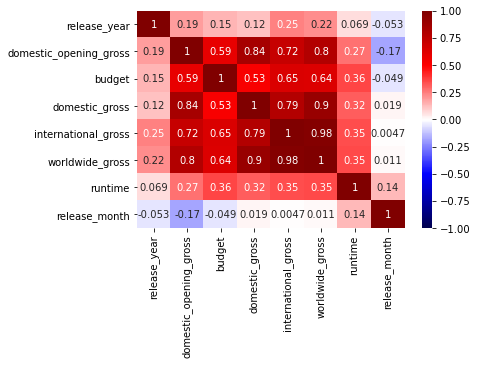

In [30]:
sns.heatmap(movies.corr(), cmap='seismic', annot = True, vmin = -1, vmax = 1)

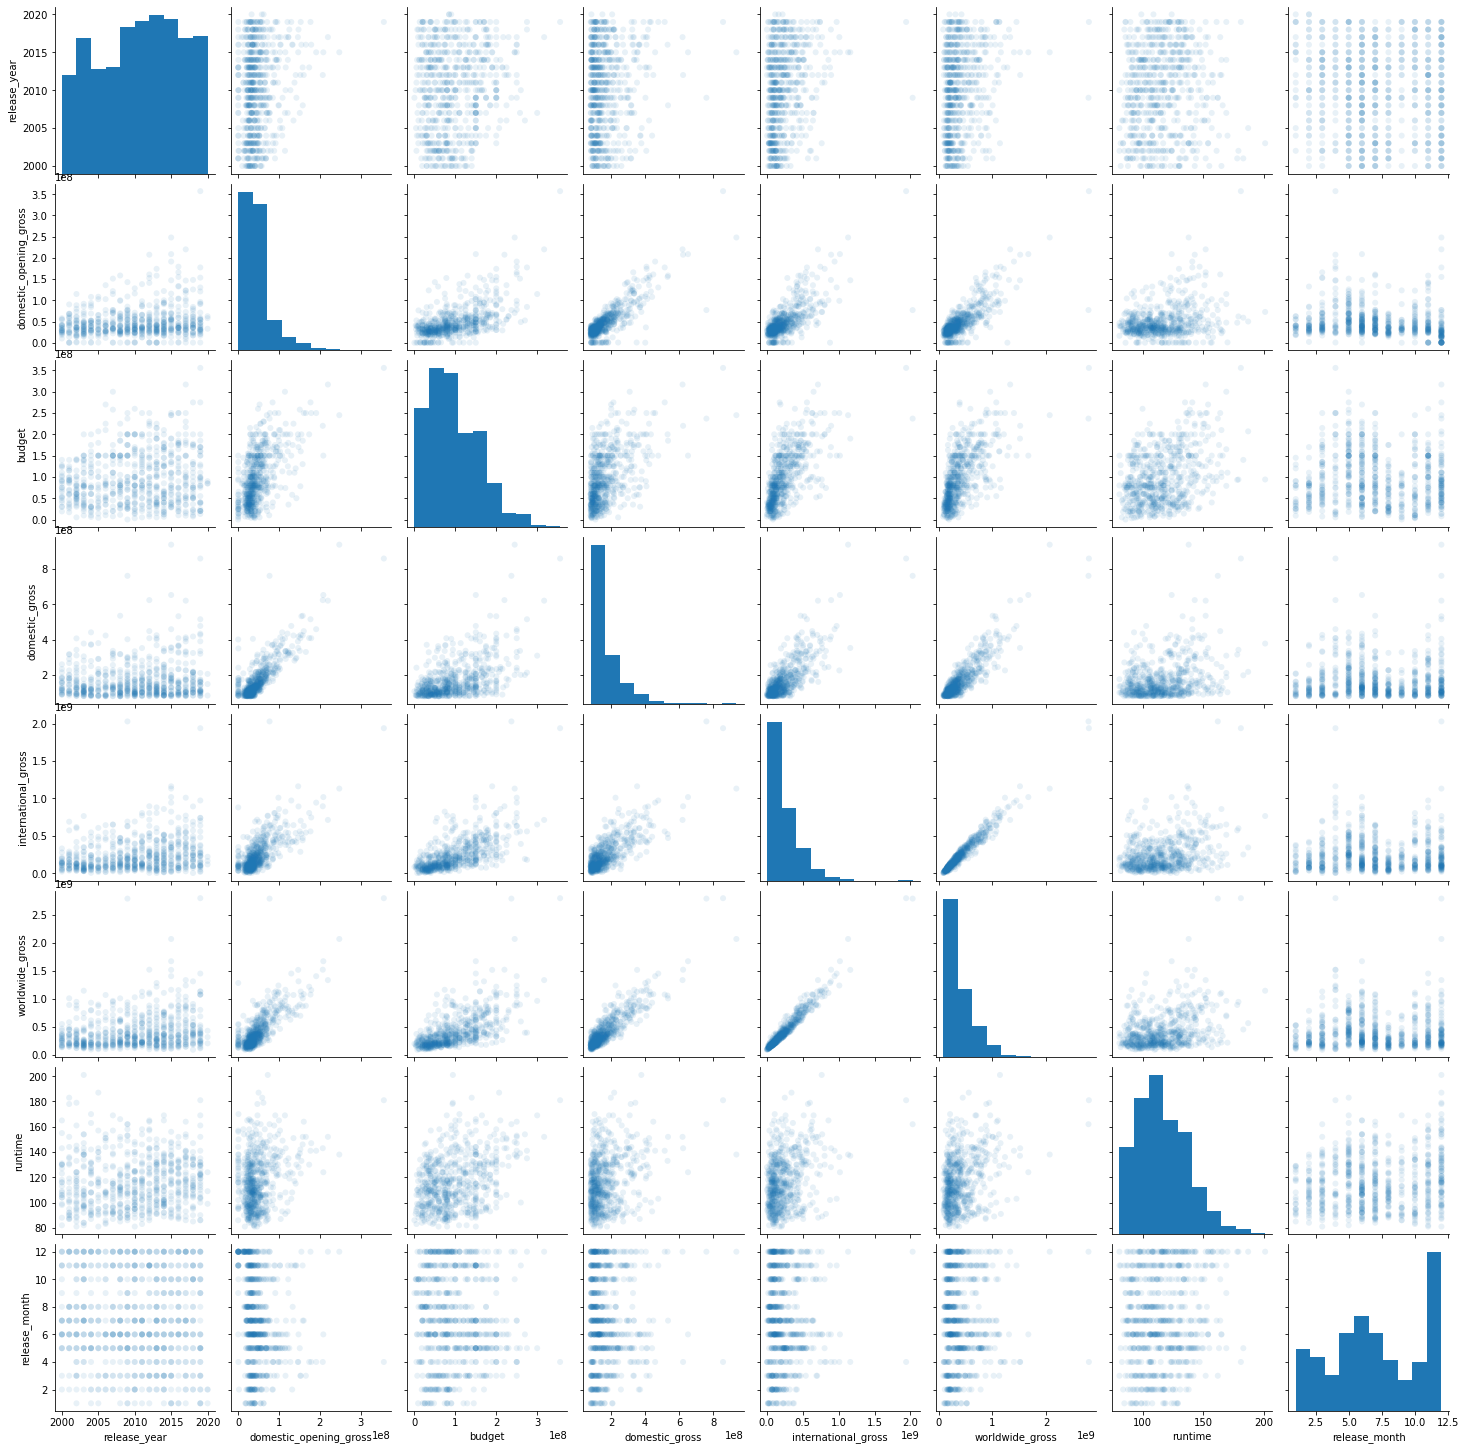

In [31]:
sns.pairplot(movies, plot_kws=dict(alpha=0.1, edgecolor='none'))

For this project I would like to predict movie worldwide revenue, at the time we know the revenues from the domestic opening. I take the total domestic revenue and international revenues out from the dataset  as those data won't be available at upon domestic opening.  

In [32]:
movies

,movie_title,rank,release_year,domestic_opening_gross,budget,domestic_gross,international_gross,worldwide_gross,runtime,rating,release_month,release_date,genres
0,Star Wars: Episode VII - The Force Awakens,1,2015,247966675,245000000,936662225,1131791908,2068454133,138.0,PG-13,12,2015-12-16,"['Action', 'Adventure', 'Sci-Fi']"
1,Avengers: Endgame,2,2019,357115007,356000000,858373000,1939427564,2797800564,181.0,PG-13,4,2019-04-24,"['Action', 'Adventure', 'Drama', 'Sci-Fi']"
2,Avatar,3,2009,77025481,237000000,760507625,2029931467,2790439092,162.0,PG-13,12,2009-12-16,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']"
6,Jurassic World,7,2015,208806270,150000000,652295625,1018130819,1670426444,124.0,PG-13,6,2015-06-10,"['Action', 'Adventure', 'Sci-Fi']"
7,The Avengers,8,2012,207438708,220000000,623357910,895457605,1518815515,143.0,PG-13,4,2012-04-25,"['Action', 'Adventure', 'Sci-Fi']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,Jack Reacher,994,2012,15210156,60000000,80070736,138269859,218340595,130.0,PG-13,12,2012-12-20,"['Action', 'Thriller']"
846,Cloverfield,995,2008,40058229,25000000,80048433,92345747,172394180,85.0,PG-13,1,2008-01-17,"['Action', 'Horror', 'Sci-Fi', 'Thriller']"
847,Dear John,997,2010,30468614,25000000,80014842,34969824,114984666,108.0,PG-13,2,2010-02-05,"['Drama', 'Romance', 'War']"
848,Men in Black: International,998,2019,30035838,110000000,80001807,173888894,253890701,114.0,PG-13,6,2019-06-12,"['Action', 'Adventure', 'Comedy', 'Sci-Fi']"


In [33]:
lm = smf.ols('worldwide_gross ~ release_year + domestic_opening_gross + budget  + runtime + release_month', data = movies)
fit = lm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        worldwide_gross   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     304.3
Date:                Thu, 21 Jan 2021   Prob (F-statistic):          1.83e-165
Time:                        20:07:00   Log-Likelihood:                -12965.
No. Observations:                 637   AIC:                         2.594e+04
Df Residuals:                     631   BIC:                         2.597e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -7.496e+09   2.44e+09     -3.077      0.002   -1.23e+10   -2.71e+09
release_year             3.64e+06   1.21e+06      3.002      0.003    1.26e+06    6.02e+06
domestic_opening_gross     5.5274      0.231     23.904      0.000       5.073       5.981
budget                     1.1217      0.138      8.133      0.000       0.851       1.393
runtime                 1.066e+06   3.52e+05      3.032      0.003    3.76e+05    1.76e+06
release_month            1.22e+07   2.11e+06      5.772      0.000    8.05e+06    1.64e+07
==============================================================================
Omnibus:                      540.032   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27954.601
Skew:                           3.386   Prob(JB):                         0.00
Kurtosis:                      34.739   Cond. No.                     4.65e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.65e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Is R^2 value good enough for movie industry? Notice the negative intercept. Is this correlation distorted by movies who fare really well and/or movies with huge loss?

In [34]:
print(f"Min movie gross income: {min(movies['worldwide_gross']-movies['budget'])}")
print(f"Max movie gross income: {max(movies['worldwide_gross']-movies['budget'])}")
print(f"Mean movie gross income: {np.mean(movies['worldwide_gross']-movies['budget'])}")

Min movie gross income: -559276
Max movie gross income: 2553439092
Mean movie gross income: 312481945.8681319


In [35]:
movies['gross_income'] = movies['worldwide_gross']-movies['budget']

In [37]:
income_df=movies.sort_values("gross_income", ascending = False)

In [38]:
# Whithout release month:

lm = smf.ols('worldwide_gross ~ release_year + domestic_opening_gross + budget  + runtime', data = movies)
fit1 = lm.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        worldwide_gross   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     354.0
Date:                Thu, 21 Jan 2021   Prob (F-statistic):          9.95e-160
Time:                        20:07:23   Log-Likelihood:                -12981.
No. Observations:                 637   AIC:                         2.597e+04
Df Residuals:                     632   BIC:                         2.599e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -7.089e+09    2.5e+09     -2.839      0.005    -1.2e+10   -2.19e+09
release_year            3.465e+06   1.24e+06      2.787      0.005    1.02e+06    5.91e+06
domestic_opening_gross     5.2717      0.233     22.656      0.000       4.815       5.729
budget                     1.1354      0.141      8.031      0.000       0.858       1.413
runtime                 1.444e+06   3.54e+05      4.077      0.000    7.48e+05    2.14e+06
==============================================================================
Omnibus:                      544.920   Durbin-Watson:                   1.576
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27989.601
Skew:                           3.440   Prob(JB):                         0.00
Kurtosis:                      34.737   Cond. No.                     4.65e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.65e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
#Putting back the release month and taking out the release year:

lm = smf.ols('worldwide_gross ~ release_month + domestic_opening_gross + budget  + runtime', data = movies)
fit2 = lm.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        worldwide_gross   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     373.4
Date:                Thu, 21 Jan 2021   Prob (F-statistic):          7.73e-165
Time:                        20:07:31   Log-Likelihood:                -12969.
No. Observations:                 637   AIC:                         2.595e+04
Df Residuals:                     632   BIC:                         2.597e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.845e+08   3.94e+07     -4.681      0.000   -2.62e+08   -1.07e+08
release_month           1.204e+07   2.13e+06      5.663      0.000    7.87e+06    1.62e+07
domestic_opening_gross     5.6121      0.231     24.300      0.000       5.159       6.066
budget                     1.1384      0.139      8.209      0.000       0.866       1.411
runtime                 1.078e+06   3.54e+05      3.048      0.002    3.84e+05    1.77e+06
==============================================================================
Omnibus:                      533.007   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25906.874
Skew:                           3.339   Prob(JB):                         0.00
Kurtosis:                      33.520   Cond. No.                     7.48e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.48e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Among the features, release year and month yield the highest standard errors followed by runtime. However if I take those out from the feature variables, I'll be left only with purely financial features budget and the revenu from the domestic opening. Let's see by taking out those features, one at a time.

In [40]:
#Putting back the release month and taking out the running tme:

lm = smf.ols('worldwide_gross ~ release_year + domestic_opening_gross + budget  + release_month', data = movies)
fit3 = lm.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        worldwide_gross   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     373.3
Date:                Thu, 21 Jan 2021   Prob (F-statistic):          8.47e-165
Time:                        20:07:33   Log-Likelihood:                -12969.
No. Observations:                 637   AIC:                         2.595e+04
Df Residuals:                     632   BIC:                         2.597e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -7.479e+09   2.45e+09     -3.051      0.002   -1.23e+10   -2.66e+09
release_year            3.683e+06   1.22e+06      3.017      0.003    1.29e+06    6.08e+06
domestic_opening_gross     5.6065      0.231     24.245      0.000       5.152       6.061
budget                     1.2265      0.134      9.126      0.000       0.963       1.490
release_month           1.339e+07   2.09e+06      6.408      0.000    9.29e+06    1.75e+07
==============================================================================
Omnibus:                      543.932   Durbin-Watson:                   1.584
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28799.749
Skew:                           3.418   Prob(JB):                         0.00
Kurtosis:                      35.223   Cond. No.                     4.65e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.65e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Taking out the time features resulted in worst R^2 so I keep them all for further analysis.

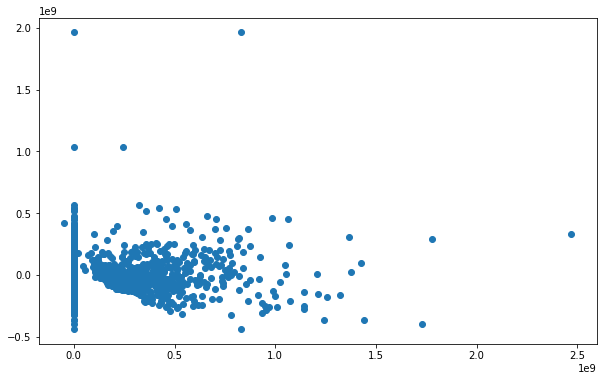

In [41]:
lm = smf.ols('worldwide_gross ~ domestic_opening_gross + budget  + runtime + release_year + release_month', data = movies)
plt.figure(figsize=(12,8))
plt.scatter(fit.predict(),fit.resid);
fit.resid.plot(style = 'o', figsize=(10,6));

# Regression with sklearn

In [42]:
X_train, X_test, y_train, y_test = train_test_split(movies[['domestic_opening_gross','budget','runtime','release_month','release_year']], movies['worldwide_gross'], test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train,y_train)
#lr.score(X_train,y_train)
#lr.score(X_test,y_test)
print(f"Training score: {lr.score(X_train,y_train)}, Test score: {lr.score(X_test,y_test)}")

Training score: 0.7615548202334808, Test score: 0.4925708470285062


Training score is higher than test score, is the training model overfit or too complex?

Let's first try applying some function to the target feature:

In [43]:
movies['log_revenue'] = np.log(movies.worldwide_gross)
X_train, X_test, y_train, y_test = train_test_split(movies[['domestic_opening_gross','budget','runtime','release_month','release_year']], movies['log_revenue'], test_size=0.2, random_state=42)
lr1 = LinearRegression()
lr1.fit(X_train,y_train)
#lr.score(X_train,y_train)
#lr.score(X_test,y_test)
print(f"Training score: {lr1.score(X_train,y_train)}, Test score: {lr1.score(X_test,y_test)}")

Training score: 0.6491192623154068, Test score: 0.5920234004667562


The test score increased but the training score decreased

In [44]:
movies['budget_sq'] = movies['budget']**2
movies['gross_open_sq'] = movies['domestic_opening_gross']**2
movies['runtime_sq']= movies['runtime']**2
movies['month_sq']= movies['release_month']**2
movies['year_sq']=movies['release_year']**2

In [45]:
# applying second degree poly to opening gross
X_train, X_test, y_train, y_test = train_test_split(movies[['gross_open_sq','budget','runtime','release_month','release_year']], movies['worldwide_gross'], test_size=0.2, random_state=42)
lr2 = LinearRegression()
lr2.fit(X_train,y_train)

print(f"Training score: {lr2.score(X_train,y_train)}, Test score: {lr2.score(X_test,y_test)}")

Training score: 0.713284127659273, Test score: 0.4411039457942487


Training score decreased from the base model

In [46]:
# applying second degree poly to budget
X_train, X_test, y_train, y_test = train_test_split(movies[['domestic_opening_gross','budget_sq','runtime','release_month','release_year']], movies['worldwide_gross'], test_size=0.2, random_state=42)
lr3 = LinearRegression()
lr3.fit(X_train,y_train)

print(f"Training score: {lr3.score(X_train,y_train)}, Test score: {lr3.score(X_test,y_test)}")

Training score: 0.7404206189941387, Test score: 0.4702218388711219


In [47]:
# applying second degree poly to runtime
X_train, X_test, y_train, y_test = train_test_split(movies[['domestic_opening_gross','budget','runtime_sq','release_month','release_year']], movies['worldwide_gross'], test_size=0.2, random_state=42)
lr4 = LinearRegression()
lr4.fit(X_train,y_train)

print(f"Training score: {lr4.score(X_train,y_train)}, Test score: {lr4.score(X_test,y_test)}")

Training score: 0.7621841077076215, Test score: 0.4981206766496904


Both training and test scores increased although the test score is much lower than training score

In [48]:
# applying second degree poly to release month
X_train, X_test, y_train, y_test = train_test_split(movies[['domestic_opening_gross','budget','runtime_sq','month_sq','release_year']], movies['worldwide_gross'], test_size=0.2, random_state=42)
lr5 = LinearRegression()
lr5.fit(X_train,y_train)

print(f"Training score: {lr5.score(X_train,y_train)}, Test score: {lr5.score(X_test,y_test)}")

Training score: 0.7632816013376003, Test score: 0.5044412805738102


Both training and test scores increased although the test score is much lower than training score

In [50]:
# applying second degree poly to release year
X_train, X_test, y_train, y_test = train_test_split(movies[['domestic_opening_gross','budget','runtime_sq','month_sq','year_sq']], movies['worldwide_gross'], test_size=0.2, random_state=42)
lr6 = LinearRegression()
lr6.fit(X_train,y_train)

print(f"Training score: {lr6.score(X_train,y_train)}, Test score: {lr6.score(X_test,y_test)}")

Training score: 0.7632879002243658, Test score: 0.5044278915223428


There's hardly any change. Trying adding other features

In [53]:
movies['comb_1']=movies['budget']*movies['runtime']
movies['comb_2']=movies['domestic_opening_gross']*movies['runtime']
movies['comb_3']=movies['domestic_opening_gross']/movies['release_year']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(movies[['comb_1','domestic_opening_gross','budget','runtime_sq','month_sq','year_sq']], movies['worldwide_gross'], test_size=0.2, random_state=42)
lr7 = LinearRegression()
lr7.fit(X_train,y_train)

print(f"Training score: {lr7.score(X_train,y_train)}, Test score: {lr7.score(X_test,y_test)}")

Training score: 0.7634886951400526, Test score: 0.5014101451229314


Training score is slightly increased although test score decreased

In [55]:
X_train, X_test, y_train, y_test = train_test_split(movies[['comb_1', 'comb_2','domestic_opening_gross','budget','runtime_sq','month_sq','year_sq']], movies['worldwide_gross'], test_size=0.2, random_state=42)
lr8 = LinearRegression()
lr8.fit(X_train,y_train)

print(f"Training score: {lr8.score(X_train,y_train)}, Test score: {lr8.score(X_test,y_test)}")

Training score: 0.7635111013997347, Test score: 0.5015220108473422


In [57]:
X_train, X_test, y_train, y_test = train_test_split(movies[['comb_1', 'comb_2', 'comb_3','domestic_opening_gross','budget','runtime_sq','month_sq','year_sq']], movies['worldwide_gross'], test_size=0.2, random_state=42)
lr9 = LinearRegression()
lr9.fit(X_train,y_train)

print(f"Training score: {lr9.score(X_train,y_train)}, Test score: {lr9.score(X_test,y_test)}")

Training score: 0.7667088474638475, Test score: 0.48508249707814344


In [58]:
movies['comb_4']=movies['budget']/movies['release_year']
movies['comb_5']=movies['release_month']*movies['runtime']
movies['comb_6']=movies['release_month']*movies['release_year']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(movies[['comb_4','comb_3', 'comb_2', 'comb_1','domestic_opening_gross','budget','runtime_sq','month_sq','year_sq']], movies['worldwide_gross'], test_size=0.2, random_state=42)
lr10 = LinearRegression()
lr10.fit(X_train,y_train)

print(f"Training score: {lr10.score(X_train,y_train)}, Test score: {lr10.score(X_test,y_test)}")

Training score: 0.7676638090221635, Test score: 0.4802800250304765


In [60]:
X_train, X_test, y_train, y_test = train_test_split(movies[['comb_5','comb_4','comb_3', 'comb_2', 'comb_1','domestic_opening_gross','budget','runtime_sq','month_sq','year_sq']], movies['worldwide_gross'], test_size=0.2, random_state=42)
lr11 = LinearRegression()
lr11.fit(X_train,y_train)

print(f"Training score: {lr11.score(X_train,y_train)}, Test score: {lr11.score(X_test,y_test)}")

Training score: 0.7682054411126551, Test score: 0.4834080079105396


In [62]:
X_train, X_test, y_train, y_test = train_test_split(movies[['comb_6','comb_5','comb_4','comb_3', 'comb_2', 'comb_1','domestic_opening_gross','budget','runtime_sq','month_sq','year_sq']], movies['worldwide_gross'], test_size=0.2, random_state=42)
lr12 = LinearRegression()
lr12.fit(X_train,y_train)

print(f"Training score: {lr12.score(X_train,y_train)}, Test score: {lr12.score(X_test,y_test)}")

Training score: 0.7695463852887925, Test score: 0.4992378012132429


In [63]:
movies['comb_7']=movies['release_month']*movies['domestic_opening_gross']
X_train, X_test, y_train, y_test = train_test_split(movies[['comb_7','comb_6','comb_5','comb_4','comb_3', 'comb_2', 'comb_1','domestic_opening_gross','budget','runtime_sq','month_sq','year_sq']], movies['worldwide_gross'], test_size=0.2, random_state=42)
lr13 = LinearRegression()
lr13.fit(X_train,y_train)

print(f"Training score: {lr13.score(X_train,y_train)}, Test score: {lr13.score(X_test,y_test)}")

Training score: 0.7759450588288761, Test score: 0.4881555103661709


Although the training score is increasing by creating more features, the test score is decreasing. May be I should try 3rd degree polynomial.

In [65]:
X_train, X_test, y_train, y_test = train_test_split(movies[['comb_7','comb_6','comb_5','comb_4','comb_3', 'comb_2', 'comb_1','domestic_opening_gross','budget','runtime_sq','month_sq','year_sq']], movies['worldwide_gross'], test_size=0.2, random_state=42)
lr14 = LinearRegression()
p = PolynomialFeatures(degree=3)
lr14.fit(p.fit_transform(X_train),y_train)
print(f"Training score: {lr14.score(p.transform(X_train),y_train)}, Test score: {lr14.score(p.transform(X_test),y_test)}")
lr14.score(p.transform(X_train),y_train)

Training score: 0.8860090858850338, Test score: -0.7852344389781445


0.8860090858850338

Applying 3rd degree polynomial increased considerably the training score but the test score became negative.
So the I keep the features used in lr13 and will add the categorical features of the movies.

### movie rating

In [68]:
print(movies.rating.value_counts())

PG-13    335
PG       146
R        145
G         11
Name: rating, dtype: int64


In [69]:
X=patsy.dmatrix('rating', data = movies, return_type = 'dataframe')
X.head(5)

,Intercept,rating[T.PG],rating[T.PG-13],rating[T.R]
0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0
6,1.0,0.0,1.0,0.0
7,1.0,0.0,1.0,0.0


In [81]:
movies=movies.join(X)
movies.head()

,movie_title,rank,release_year,domestic_opening_gross,budget,domestic_gross,international_gross,worldwide_gross,runtime,rating,...,comb_3,comb_4,comb_5,comb_6,comb_7,d2k_year,Intercept,rating[T.PG],rating[T.PG-13],rating[T.R]
0,Star Wars: Episode VII - The Force Awakens,1,2015,247966675,245000000,936662225,1131791908,2068454133,138.0,PG-13,...,123060.384615,121588.089330,1656.0,24180,2975600100,0.992556,1.0,0.0,1.0,0.0
1,Avengers: Endgame,2,2019,357115007,356000000,858373000,1939427564,2797800564,181.0,PG-13,...,176877.170381,176324.913323,724.0,8076,1428460028,0.990589,1.0,0.0,1.0,0.0
2,Avatar,3,2009,77025481,237000000,760507625,2029931467,2790439092,162.0,PG-13,...,38340.209557,117969.138875,1944.0,24108,924305772,0.995520,1.0,0.0,1.0,0.0
6,Jurassic World,7,2015,208806270,150000000,652295625,1018130819,1670426444,124.0,PG-13,...,103625.940447,74441.687345,744.0,12090,1252837620,0.992556,1.0,0.0,1.0,0.0
7,The Avengers,8,2012,207438708,220000000,623357910,895457605,1518815515,143.0,PG-13,...,103100.749503,109343.936382,572.0,8048,829754832,0.994036,1.0,0.0,1.0,0.0


In [82]:
movies.rename(columns={'rating[T.PG]':'PG', 'rating[T.PG-13]':'PG-13', 'rating[T.R]':'R'}, inplace=True )

In [83]:
movies.head(2)

,movie_title,rank,release_year,domestic_opening_gross,budget,domestic_gross,international_gross,worldwide_gross,runtime,rating,...,comb_3,comb_4,comb_5,comb_6,comb_7,d2k_year,Intercept,PG,PG-13,R
0,Star Wars: Episode VII - The Force Awakens,1,2015,247966675,245000000,936662225,1131791908,2068454133,138.0,PG-13,...,123060.384615,121588.089330,1656.0,24180,2975600100,0.992556,1.0,0.0,1.0,0.0
1,Avengers: Endgame,2,2019,357115007,356000000,858373000,1939427564,2797800564,181.0,PG-13,...,176877.170381,176324.913323,724.0,8076,1428460028,0.990589,1.0,0.0,1.0,0.0


In [84]:
X_train, X_test, y_train, y_test = train_test_split(movies[['PG','PG-13', 'R','comb_7','comb_6','comb_5','comb_4','comb_3', 'comb_2', 'comb_1','domestic_opening_gross','budget','runtime_sq','month_sq','year_sq']], movies['worldwide_gross'], test_size=0.2, random_state=42)
lm = LinearRegression()
lm.fit(X_train,y_train)

print(f"Training score: {lm.score(X_train,y_train)}, Test score: {lm.score(X_test,y_test)}")

Training score: 0.7870115950328704, Test score: 0.49605951729112463


Including the rating in the model, increased both training & test scores

### movie genres

In [67]:
print(movies.genres.value_counts())

['Action', 'Adventure', 'Sci-Fi']                            46
['Comedy']                                                   29
['Comedy', 'Romance']                                        26
['Adventure', 'Animation', 'Comedy', 'Family', 'Fantasy']    21
['Action', 'Adventure', 'Sci-Fi', 'Thriller']                19
                                                             ..
['Adventure', 'Drama', 'War']                                 1
['Action', 'Drama', 'History', 'Romance', 'War']              1
['Comedy', 'Drama', 'Fantasy', 'Romance']                     1
['Action', 'Comedy', 'Crime', 'Family']                       1
['Action', 'Fantasy', 'Thriller']                             1
Name: genres, Length: 237, dtype: int64


Too many to dummify.
The movie genres need more rework to have group some genres together in another category and put just one category for each movie row before dummify.
Thinking in grouping into movie genres into the 6 categories:

- Action: 'Action', 'Sport','Adventure'
- Family: Family', 'Drama', 'Commedy', 'Romance'
- Documentary: 'History','Documentary','Biography'
- Crime_Thriller : 'Crime', 'Thriller'
- Animation
- Others

For now, I'm excluding the movie genres from the analysis